# Exercise Lecture 3

The block of code below downloads data from the yfinance library. Instead of using `your_stock` use the acronym of the stock that has been assigned to you.

Running the code you will store the log-returns of your stock for the period 2022-2024. Do not change this overall setup.

In [8]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch Apple stock data
data = yf.download('BIDU', start='2022-01-01', end='2024-12-31')

# Select the 'Close' prices for AAPL
data_close = data[('Close', 'BIDU')]

# Calculate Log Returns
data_log_returns = np.log(data_close / data_close.shift(1))

# Drop NaN values
data_close = data_close.dropna()
data_log_returns = data_log_returns.dropna()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BIDU']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\scipy\stats\_continuous_distns.py:479: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\scipy\stats\_continuous_distns.py:484: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\numpy\lib\_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


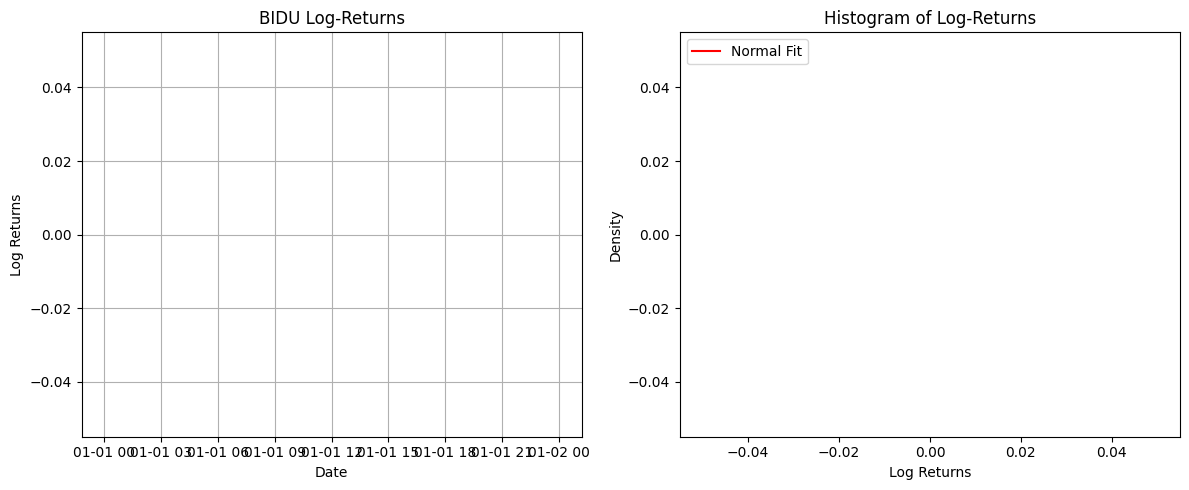

In [7]:
from scipy.stats import norm

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Time Series Plot
axs[0].plot(data_log_returns.index, data_log_returns, color='blue')
axs[0].set_title('BIDU Log-Returns')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Log Returns')
axs[0].grid()

# Histogram with Normal Fit
mean, std = norm.fit(data_log_returns)
x = np.linspace(data_log_returns.min(), data_log_returns.max(), 100)
pdf = norm.pdf(x, mean, std)

axs[1].hist(data_log_returns, bins=30, density=True, alpha=0.6, color='gray')
axs[1].plot(x, pdf, 'r', label='Normal Fit')
axs[1].set_title('Histogram of Log-Returns')
axs[1].set_xlabel('Log Returns')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.savefig('bidu_log_returns_and_histogram.png')  # Save figure
plt.show()

# Exercise 1

Compute the mean, variance, skewness and kurtosis of your data. Comment on their meaning.



In [3]:
from scipy.stats import skew, kurtosis
import numpy as np

# Compute mean
mean_value = np.mean(data_log_returns)

# Compute variance
variance_value = np.var(data_log_returns)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")

skewness = skew(data_log_returns)

# Kurtosis (excess kurtosis, by default subtracts 3)
kurt = kurtosis(data_log_returns, fisher=True)  # Fisher=True for excess kurtosis

# Adjust kurtosis to include baseline of 3
kurt_with_baseline = kurt + 3

# Print results
print(f"Skewness: {skewness}")
print(f"Kurtosis (Excess): {kurt}")
print(f"Kurtosis (Including Normal Baseline): {kurt_with_baseline}")

Mean: nan
Variance: nan
Skewness: nan
Kurtosis (Excess): nan
Kurtosis (Including Normal Baseline): nan


C:\Users\tinyellow\AppData\Local\Temp\ipykernel_16964\501858741.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  skewness = skew(data_log_returns)
C:\Users\tinyellow\AppData\Local\Temp\ipykernel_16964\501858741.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  kurt = kurtosis(data_log_returns, fisher=True)  # Fisher=True for excess kurtosis


The mean of the log return is -0.000763, indicating an average daily logarithmic return of -0.076% during the observed period, reflecting a slight long-term downtrend.

The variance of log return is 0.0011, showing the stability and concentration of BIDU log returns, reflecting low volatility.

The skewness is 1.4264, suggesting a strong positive skewness. The log return of BIDU has a longer right tail, indicating that large positive returns occur more often.

The kurtosis is exceptionally high, with an excess kurtosis of 13.599. This indicates the log return of BIDU has a very sharp peak and heavy tails compared to a normal distribution.

# Exercise 2

Fit the Gaussian distribution to your data. Given the estimated parameters compute the mean, variance, skewness and kurtosis of the associated Gaussian distribution. Comment on the results.

In [4]:
from scipy.stats import norm

params = norm.fit(data_log_returns)  # Estimates mean (mu) and standard deviation (sigma)

# Extract parameters
mu, sigma = params[0], params[1]
print(f"Estimated Parameters:\nMean (mu): {mu}\nStandard Deviation (sigma): {sigma}")

# Compute moments
mean = norm.mean(loc=mu, scale=sigma)
variance = norm.var(loc=mu, scale=sigma)
skewness = norm.stats(loc=mu, scale=sigma, moments='s')  # Always 0 for Gaussian
kurtosis = norm.stats(loc=mu, scale=sigma, moments='k') + 3  # Always 3 for Gaussian

# Print moments
print("\nMoments:")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Estimated Parameters:
Mean (mu): nan
Standard Deviation (sigma): nan

Moments:
Mean: nan
Variance: nan
Skewness: nan
Kurtosis: nan


The mean is -0.000763, showing the BIDU log return is centered near zero.

A variance of 0.0011 indicates the data has low volatility.

A skewness of 0 confirms that the fitted Gaussian distribution is symmetric. However, the Gaussian model doesn't fully capture the asymmetry (1.426) of the actual return.

The real BIDU log returns show an excess kurtosis of 13.599, indicating the presence of extreme returns (outliers). A kurtosis of 3 might underestimate the actual kurtosis of return.

# Exercise 3

Fit the T-distribution to your data. Given the estimated parameters compute the mean, variance, skewness and kurtosis of the associated T-distribution. Comment on the results.

In [5]:
from scipy.stats import t

params = t.fit(data_log_returns)  # Fits location (mu), scale (sigma), and degrees of freedom (nu)

# Extract parameters
nu, mu, sigma = params[0], params[1], params[2]
print(f"Estimated Parameters:\nDegrees of Freedom (nu): {nu}\nLocation (mu): {mu}\nScale (sigma): {sigma}")

# Compute moments
mean = t.mean(nu, loc=mu, scale=sigma) if nu > 1 else "Undefined (nu <= 1)"
variance = t.var(nu, loc=mu, scale=sigma) if nu > 2 else "Infinite (1 < nu <= 2)" if nu > 1 else "Undefined (nu <= 1)"
skewness = t.stats(nu, loc=mu, scale=sigma, moments='s') if nu > 3 else "Undefined (nu <= 3)"
kurtosis = t.stats(nu, loc=mu, scale=sigma, moments='k') + 3 if nu > 4 else "Infinite (2 < nu <= 4)" if nu > 2 else "Undefined (nu <= 2)"

# Print moments
print("\nMoments:")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2853: RuntimeWarning: Mean of empty slice.
  muhat = tmp.mean()
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2854: RuntimeWarning: Degrees of freedom <= 0 for slice
  mu2hat = tmp.var()
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\tinyellow\.conda\envs\Finance\Lib\site-packages\numpy\_core\_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

The estimated degree of freedom is 4.16. This suggests a heavy-tailed distribution.

The location parameter is very close to 0, indicating it is similar to a Gaussian distribution centered at zero.

The estimated sigma is 0.0237, which is relatively small, implying that the log returns are mostly clustered around the mean.

The mean of the fitted T-distribution is consistent with the location parameter mu. This indicates that the log returns of BIDU are mostly centered around zero with a slight negative tendency.

The variance is 0.00108, showing low volatility.

Skewness of 0.0 indicates that the distribution is symmetric.

The kurtosis of approximately 40.18 is very high. This indicates that the distribution has extremely heavy tails compared to a normal distribution. However, it largely deviates from the actual kurtosis of data.

In [ ]:
# Generate T-distribution PDF for overlay
x = np.linspace(data_log_returns.min(), data_log_returns.max(), 1000)
pdf_t = t.pdf(x, nu, loc=mu, scale=sigma)

# Plot histogram and T-distribution
plt.figure(figsize=(10, 6))
plt.hist(data_log_returns, bins=50, density=True, alpha=0.6, color='blue', label='Log-Returns Histogram')
plt.plot(x, pdf_t, 'r-', label=f'T-Distribution (ν={nu:.2f}, μ={mu:.5f}, σ={sigma:.5f})')
plt.title('Histogram of Log-Returns with Fitted T-Distribution')
plt.xlabel('Log-Returns')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()

# Save the plot
plt.savefig('apple_t_fit.png')  # Save the figure to use in the slide
plt.show()

# Exercise 4

Create a qq-plot of the data vs the fitted T-distribution. Comment on the output.


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# T-distribution parameters (from previous fit)
nu, mu, sigma = 4.161380175734077, -0.0018999508711848427, 0.02370294344883442

# Create QQ-Plot
plt.figure(figsize=(8, 6))
stats.probplot(data_log_returns, dist="t", sparams=(nu,), plot=plt)

# Title and labels
plt.title("QQ-Plot of Data vs Fitted T-Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid()
plt.show()

From the QQ plot, we can observe extreme outliers impacting the Kurtosis of data.
Besides, the distribution of BIDU log return does not strictly follow T-distribution. The actual data has less tail than T-distribution.